In [1]:
import pandas as pd
import os
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
base_dir = os.path.dirname(os.getcwd())
movies_path = os.path.join(base_dir, 'data', 'Movies_final_ML.csv')
df = pd.read_csv(movies_path)
df.info()
df.head(87000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               87585 non-null  int64  
 1   imdbId                87585 non-null  object 
 2   vote_average          86493 non-null  float64
 3   vote_count            86493 non-null  float64
 4   status                86493 non-null  object 
 5   release_date          87455 non-null  object 
 6   revenue               86493 non-null  float64
 7   runtime               86493 non-null  float64
 8   adult                 86493 non-null  object 
 9   backdrop_path         70442 non-null  object 
 10  budget                86493 non-null  float64
 11  homepage              17774 non-null  object 
 12  original_language     86493 non-null  object 
 13  original_title        86493 non-null  object 
 14  overview              85667 non-null  object 
 15  popularity         

,movieId,imdbId,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,original_language,original_title,overview,popularity,poster_path,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors
0,1,tt0114709,7.971,17152.0,Released,1995-10-30,394400000.0,81.0,False,/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,30000000.0,http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",78.404,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,Hang on for the comedy that goes to infinity a...,Pixar,United States of America,English,"rescue, friendship, mission, martial arts, jea...",Toy Story,"Animation, Adventure, Family, Comedy",John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Tom Hanks, Tim Allen, Don Rickles"
1,2,tt0113497,7.239,9833.0,Released,1995-12-15,262821940.0,104.0,False,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,65000000.0,http://www.sonypictures.com/movies/jumanji/,en,Jumanji,When siblings Judy and Peter discover an encha...,13.444,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,Roll the dice and unleash the excitement!,"TriStar Pictures, Interscope Communications, T...",United States of America,"English, French","giant insect, board game, disappearance, jungl...",Jumanji,"Adventure, Fantasy, Family",Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt, Jo...","Robin Williams, Kirsten Dunst, Bonnie Hunt"
2,3,tt0113228,6.476,347.0,Released,1995-12-22,71500000.0,101.0,False,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,25000000.0,NaN,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,14.815,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,Still Yelling. Still Fighting. Still Ready for...,"Lancaster Gate, Warner Bros. Pictures",United States of America,English,"fishing, sequel, old man, best friend, wedding...",Grumpier Old Men,"Romance, Comedy",Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Walter Matthau, Jack Lemmon, Ann-Margret"
3,4,tt0114885,6.183,142.0,Released,1995-12-22,81452156.0,127.0,False,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,16000000.0,NaN,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",14.451,/4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg,Friends are the people who let you be yourself...,20th Century Fox,United States of America,English,"based on novel or book, interracial relationsh...",Waiting to Exhale,"Comedy, Drama, Romance",Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...","Whitney Houston, Angela Bassett, Loretta Devine"
4,5,tt0113041,6.228,659.0,Released,1995-12-08,76594107.0,106.0,False,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,0.0,NaN,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,14.537,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg,Just when his world is back to normal... he's ...,"Touchstone Pictures, Sandollar Productions",United States of America,English,"daughter, baby, parent child relationship, mid...",Father of the Bride Part II,"Comedy, Family",Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Steve Martin, Diane Keaton, Martin Short"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86995,290483,tt0091655,6.417,6.0,Released,1986-07-25,9818377.0,95.0,False,/6nGekkcBL18Sh0RInTzG55lPxsj.jpg,0.0,NaN,cn,扭計雜牌軍,Frequent Jackie Chan cohort Mars stars as Sing...,3.381,/AY9w97SHO1L6A6mCP8zwAh6yzq.jpg,NaN,Paragon Films Ltd.,Hong Kong,Cantonese,NaN,Naughty Boys,"Action, Comedy",Wellson Chin,"Carina Lau, Kara Ying Hung Wai, Mars, Clarence...","Carina Lau, Kara Ying Hung Wai, Mars"
86996,290485,tt26315142,6.286,7.0,Released,2023-09-07,0.0,95.0,False,/ueGDrUAyaA3HyucvixFOkr4nqPD.jpg,0.0,NaN,es,Tótem,Seven year old Sol spends the day at her grand...,18.550,/c7FGI4wXaC2N15snz3W84yAgGf3.jpg,NaN,"Limerencia Films, Paloma Productions, Alpha Vi...","Denmark, France, Mexico",Spanish,NaN,Tótem,Drama,Lila Avilés,"Naíma Sentíes, Montserrat Marañon, Marisol Gas...","Naíma Sentíes, Montserra

In [3]:
def count_zeros_and_empty(df):
    count_dict = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            zero_count = (df[col] == 0).sum()
            count_dict[col] = {'zeros': zero_count}

        elif pd.api.types.is_string_dtype(df[col]):
            empty_count = (df[col] == '').sum()
            count_dict[col] = {'empty_strings': empty_count}

    return count_dict

count_result = count_zeros_and_empty(df)
print(count_result)


{'movieId': {'zeros': 0}, 'imdbId': {'empty_strings': 0}, 'vote_average': {'zeros': 2576}, 'vote_count': {'zeros': 2566}, 'revenue': {'zeros': 73454}, 'runtime': {'zeros': 1262}, 'budget': {'zeros': 71884}, 'popularity': {'zeros': 0}, 'title': {'empty_strings': 0}}


# Początkowe usunięcie niepotrzebnych kolumn

In [4]:
df = df.drop(columns=['adult', 'homepage', 'backdrop_path', 'imdbId', 'poster_path'])
mask_status = ((df['status'] == 'Released') |df['status'].isna() |(df['status'] == ''))
df = (
    df[mask_status]
    .drop(columns=['status'])
    .reset_index(drop=True)
)

In [5]:
print(df.info())

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               87569 non-null  int64  
 1   vote_average          86477 non-null  float64
 2   vote_count            86477 non-null  float64
 3   release_date          87440 non-null  object 
 4   revenue               86477 non-null  float64
 5   runtime               86477 non-null  float64
 6   budget                86477 non-null  float64
 7   original_language     86477 non-null  object 
 8   original_title        86477 non-null  object 
 9   overview              85652 non-null  object 
 10  popularity            86477 non-null  float64
 11  tagline               39728 non-null  object 
 12  production_companies  72717 non-null  object 
 13  production_countries  79781 non-null  object 
 14  spoken_languages      82388 non-null  object 
 15  keywords           

,movieId,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors
0,1,7.971,17152.0,1995-10-30,394400000.0,81.0,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",78.404,Hang on for the comedy that goes to infinity a...,Pixar,United States of America,English,"rescue, friendship, mission, martial arts, jea...",Toy Story,"Animation, Adventure, Family, Comedy",John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Tom Hanks, Tim Allen, Don Rickles"
1,2,7.239,9833.0,1995-12-15,262821940.0,104.0,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,13.444,Roll the dice and unleash the excitement!,"TriStar Pictures, Interscope Communications, T...",United States of America,"English, French","giant insect, board game, disappearance, jungl...",Jumanji,"Adventure, Fantasy, Family",Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt, Jo...","Robin Williams, Kirsten Dunst, Bonnie Hunt"
2,3,6.476,347.0,1995-12-22,71500000.0,101.0,25000000.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,14.815,Still Yelling. Still Fighting. Still Ready for...,"Lancaster Gate, Warner Bros. Pictures",United States of America,English,"fishing, sequel, old man, best friend, wedding...",Grumpier Old Men,"Romance, Comedy",Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Walter Matthau, Jack Lemmon, Ann-Margret"


# Inzynieria cech

In [6]:
# IMDB WEIGHTED AVERAGE

C = df['vote_average'].mean()
m = 304 # TOP 10 %
# m = 99 # TOP 20 %

def weighted_rating(row, m=m, C=C):
    v = row['vote_count']
    R = row['vote_average']
    return (R * v + C * m) / (v + m) if v > 0 else 0

df['vote_score'] = df.apply(weighted_rating, axis=1)

In [7]:
# BLOCKBUSTER

budget_threshold = df['revenue'].quantile(0.95)
popularity_threshold = df['popularity'].quantile(0.90)
vote_score_threshold = df['vote_score'].quantile(0.90)

df['if_blockbuster'] = np.where(
    (df['vote_score'] >= vote_score_threshold) &
    (df['revenue'] >= budget_threshold) &
    (df['popularity'] >= popularity_threshold),
    1,
    0
)

print(df[['title', 'revenue', 'popularity', 'vote_score', 'if_blockbuster']].head())


                         title      revenue  popularity  vote_score  \
0                    Toy Story  394400000.0      78.404    7.933887   
1                      Jumanji  262821940.0      13.444    7.197044   
2             Grumpier Old Men   71500000.0      14.815    6.178982   
3            Waiting to Exhale   81452156.0      14.451    5.949173   
4  Father of the Bride Part II   76594107.0      14.537    6.105501   

   if_blockbuster  
0               1  
1               1  
2               0  
3               0  
4               0  


In [8]:
# HIGHLY WATCHED

df['highly_watched'] = np.where(
    ((df['popularity'] >= popularity_threshold) & (df['vote_count'] >= df['vote_count'].quantile(0.80))),
    1,
    0
)

print(df[['title', 'budget', 'popularity', 'vote_count', 'vote_score', 'if_blockbuster', 'highly_watched']].head())

                         title      budget  popularity  vote_count  \
0                    Toy Story  30000000.0      78.404     17152.0   
1                      Jumanji  65000000.0      13.444      9833.0   
2             Grumpier Old Men  25000000.0      14.815       347.0   
3            Waiting to Exhale  16000000.0      14.451       142.0   
4  Father of the Bride Part II         0.0      14.537       659.0   

   vote_score  if_blockbuster  highly_watched  
0    7.933887               1               1  
1    7.197044               1               1  
2    6.178982               0               1  
3    5.949173               0               1  
4    6.105501               0               1  


In [9]:
# YEAR AND DECADES

df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# BECAUSE WE HAVE 9 MOVIES <1890 WE CHANGE THEIR YEAR TO 1890
df.loc[df['release_year'] < 1890, 'release_year'] = 1890
df['decade'] = pd.cut(df['release_year'], bins=range(1890, 2031, 10), right=False)

In [10]:
# HIGHLY RATED WITH DIVISION ON DECADES

vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)

def is_highly_rated(row):
    decade = row['decade']
    score = row['vote_score']
    count = row['vote_count']

    if pd.isna(decade) or pd.isna(score) or pd.isna(count):
        return 0

    threshold = vote_score_thresholds.get(decade, np.inf)

    # To block low_voted movies
    if count >= 50 and score >= threshold:
        return 1
    return 0

df['highly_rated'] = df.apply(is_highly_rated, axis=1)

/var/folders/sq/926ppx_14j32gjs3g17d4skr0000gn/T/ipykernel_68692/706416051.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)


In [11]:
# COMBINING VOTE_SCORE AND POPULARITY
# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler()
# df[['scaled_votes', 'scaled_popularity']] = scaler.fit_transform(df[['vote_count', 'popularity']])
#
# df['engagement_score'] = 0.6 * df['scaled_votes'] + 0.4 * df['scaled_popularity']

from sklearn.preprocessing import QuantileTransformer

quantile = QuantileTransformer(output_distribution='normal', random_state=42, n_quantiles=1000)

df[['scaled_votes', 'scaled_popularity']] = quantile.fit_transform(df[['vote_count', 'popularity']])

df['engagement_score'] = 0.6 * df['scaled_votes'] + 0.4 * df['scaled_popularity']

df['engagement_score'] = df['engagement_score'].fillna(0.0) # TO BE ABLE TO COUNT SCORES FOR MOVIES WITH 0 engagement_score


In [12]:
# WE GET ENGLISH STOPWORDS
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/monia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# SEMANTIC_KEYWORDS (MERGE OF TAGLINE + KEYWORDS)

import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_and_tokenize_tagline(tagline):
    if pd.isna(tagline):
        return []
    words = re.sub(r'[^\w\s]', '', tagline.lower()).split()
    filtered = [w for w in words if w not in stop_words]
    return filtered

def combine_keywords_and_tagline(row):
    kw = row['keywords'] if pd.notna(row['keywords']) else ''
    tag_tokens = clean_and_tokenize_tagline(row['tagline'])
    kw_tokens = [k.strip().lower() for k in kw.split(',') if k]
    combined = kw_tokens + tag_tokens
    return list(set(combined))

df['semantic_keywords'] = df.apply(combine_keywords_and_tagline, axis=1)

In [14]:
# CAST IMPORTANCE AND TOP ACTORS

from collections import defaultdict

df['Cast'] = df['Cast'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Cast'] = df['Cast'].apply(lambda x: [] if x == [''] else x)

actor_engagement = defaultdict(list)

for _, row in df.iterrows():
    cast = row['Cast']
    engagement = row.get('engagement_score', np.nan)
    if not isinstance(cast, list) or pd.isna(engagement):
        continue
    for actor in cast:
        actor_engagement[actor].append(engagement)

actor_score = {
    actor: np.mean(scores) * np.log1p(len(scores))
    for actor, scores in actor_engagement.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 5)
TOP_N = 5
MAX_CAST_LEN = df['Cast'].apply(len).max()

def compute_cast_importance_with_names(cast):
    if not cast or len(cast) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(actor, actor_score.get(actor, 0)) for actor in cast], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    weight = len(top_scores) / MAX_CAST_LEN if MAX_CAST_LEN > 0 else 1.0
    importance = mean_score * weight
    top_actors = [s[0] for s in top_scores]
    return pd.Series([importance, top_actors])

df[['cast_importance', 'top_cast_members']] = df['Cast'].apply(compute_cast_importance_with_names)

In [15]:
df.tail(1000)

,movieId,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors,vote_score,if_blockbuster,highly_watched,release_year,decade,highly_rated,scaled_votes,scaled_popularity,engagement_score,semantic_keywords,cast_importance,top_cast_members
86569,289049,7.2,3.0,2013-03-21,0.0,87.0,0.0,en,Why We Laugh: Funny Women,An uncensored look into the lives of the femal...,2.444,"Personal, bold and extremely funny stories fro...",Codeblack Films,United States of America,"English, Spanish",stand-up comedy,Why We Laugh: Funny Women,"Documentary, Comedy",NaN,[],NaN,5.853242,0,0,2013.0,"[2010, 2020)",0,-1.189522,-0.214978,-0.799704,"[stand-up comedy, funny, women, extremely, cou...",0.000000,[]
86570,289051,7.7,7.0,2015-05-28,0.0,102.0,0.0,en,Paper Tigers,Follows a year in the life of an alternative h...,1.991,One high school's unlikely success story.,KPJR Films,United States of America,English,"high school, truancy, substance abuse",Paper Tigers,Documentary,NaN,[],NaN,5.881817,0,0,2015.0,"[2010, 2020)",0,-0.645631,-0.420124,-0.555428,"[success, story, truancy, schools, unlikely, o...",0.000000,[]
86571,289053,8.0,1.0,2009-01-01,0.0,109.0,0.0,en,Waterlife,A look at the natural beauty and environmental...,0.658,NaN,NaN,Canada,English,environment,Waterlife,Documentary,NaN,[],NaN,5.847034,0,0,2009.0,"[2000, 2010)",0,-1.684464,-1.600660,-1.650942,[environment],0.000000,[]
86572,289055,5.0,4.0,2017-09-22,0.0,95.0,0.0,en,Elizabeth Blue,"A young woman, recently released from a mental...",1.537,"True love can't be broken by anything, includi...","Global Digital Releasing, Nittle Baby Productions",United States of America,English,"schizophrenia, mental hospital",Elizabeth Blue,Drama,Vincent Sabella,"[Anna Schafer, Ryan Vincent, Adewale Akinnuoye...","Anna Schafer, Ryan Vincent, Adewale Akinnuoye-...",5.829043,0,0,2017.0,"[2010, 2020)",0,-1.016672,-0.687100,-0.884844,"[illness, true, including, mental hospital, ca...",0.669119,"[Adewale Akinnuoye-Agbaje, Kathleen Quinlan, N..."
86573,289057,0.0,0.0,2021-06-01,0.0,81.0,0.0,en,Rock Sugar,Twelve-year-old Charlotte commits the unthinka...,0.840,NaN,Matter Obscura Films,Australia,English,NaN,Rock Sugar,Thriller,Angela How,"[Candice Leask, Olivia Sprague, Francine McAse...","Candice Leask, Olivia Sprague, Francine McAsey",0.000000,0,0,2021.0,"[2020, 2030)",0,-5.199338,-1.346386,-3.658157,[],-1.083255,"[Akira Matsumoto, Olivia Sprague, Francine McA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87564,292709,7.1,14.0,2017-03-16,0.0,97.0,0.0,de,Zwischen den Jahren,Becker is a German ex-con trying to hold down ...,2.299,NaN,"Radical Movies Production, ARTE, WDR, ARD",Germany,German,NaN,End of the Season,Drama,Lars Henning,"[Peter Kurth, Karl Markovics, Catrin Striebeck...","Peter Kurth, Karl Markovics, Catrin Striebeck",5.895425,0,0,2017.0,"[2010, 2020)",0,-0.185480,-0.273739,-0.220783,[],0.130655,"[Karl Markovics, Peter Kurth, Catrin Striebeck..."
87565,292731,0.0,0.0,2022-10-06,0.0,92.0,0.0,es,El caso Monroy,Ronnie Monroy has had an unmeaningful life as ...,1.400,NaN,"Chullachaki Producciones, Gema Films","Argentina, Peru",Spanish,NaN,The Monroy Affaire,Drama,Josué Méndez,"[Damián Alcázar, Lia Camilo, Andrea Luna, Mary...","Damián Alcázar, Lia Camilo, Andrea Luna",0.000000,0,0,2022.0,"[2020, 2030)",0,-5.199338,-0.790168,-3.435670,[],-0.682470,"[Damián Alcázar, Martin Martinez, Liliana Truj..."
87566,292753,0.0,0.0,2023-09-01,0.0,107.0,0.0,fa,Orca,"Elham is a young, divorced Iranian woman. Seek...",1.382,Her life. Her freedom.,"Andisheh Pardis Jam, Katara Studios","Iran, Qatar",Persian,NaN,Orca,Drama,Sahar Mosayebi,"[Taraneh Alidoosti, Mahtab Keramati, Ayoub Afs...","Taraneh Alidoosti, Mahtab Keramati, Ayoub Afshar",0.000000,0,0,2023.0,"[2020, 2030)",0,

In [16]:
# DIRECTORS SCORE AND BEST DIRECTORS

df['Directors'] = df['Directors'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Directors'] = df['Directors'].apply(lambda x: [] if x == [''] else x)

director_engagement_sum = defaultdict(float)
director_film_count = defaultdict(int)

for idx, row in df.iterrows():
    engagement = row['engagement_score']
    for director in row['Directors']:
        director_engagement_sum[director] += engagement
        director_film_count[director] += 1

director_score = {
    director: total_engagement / np.log1p(director_film_count[director])
    for director, total_engagement in director_engagement_sum.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 3)
TOP_N_DIRECTORS = 3

def compute_director_importance_with_names(directors):
    if not directors or len(directors) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(d, director_score.get(d, 0)) for d in directors], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N_DIRECTORS]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    return pd.Series([mean_score, [s[0] for s in top_scores]])

df[['director_score', 'top_directors']] = df['Directors'].apply(compute_director_importance_with_names)

In [17]:
df.head(1000)

,movieId,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors,vote_score,if_blockbuster,highly_watched,release_year,decade,highly_rated,scaled_votes,scaled_popularity,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors
0,1,7.971,17152.0,1995-10-30,394400000.0,81.0,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",78.404,Hang on for the comedy that goes to infinity a...,Pixar,United States of America,English,"rescue, friendship, mission, martial arts, jea...",Toy Story,"Animation, Adventure, Family, Comedy",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","Tom Hanks, Tim Allen, Don Rickles",7.933887,1,1,1995.0,"[1990, 2000)",1,3.154847,2.628405,2.944270,"[goes, walkie talkie, toy comes to life, beyon...",1.971076,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",7.720041,[John Lasseter]
1,2,7.239,9833.0,1995-12-15,262821940.0,104.0,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,13.444,Roll the dice and unleash the excitement!,"TriStar Pictures, Interscope Communications, T...",United States of America,"English, French","giant insect, board game, disappearance, jungl...",Jumanji,"Adventure, Fantasy, Family",[Joe Johnston],"[Robin Williams, Kirsten Dunst, Bonnie Hunt, J...","Robin Williams, Kirsten Dunst, Bonnie Hunt",7.197044,1,1,1995.0,"[1990, 2000)",1,2.741050,1.298365,2.163976,"[recluse, dice, giant insect, board game, disa...",1.997949,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",7.559032,[Joe Johnston]
2,3,6.476,347.0,1995-12-22,71500000.0,101.0,25000000.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,14.815,Still Yelling. Still Fighting. Still Ready for...,"Lancaster Gate, Warner Bros. Pictures",United States of America,English,"fishing, sequel, old man, best friend, wedding...",Grumpier Old Men,"Romance, Comedy",[Howard Deutch],"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","Walter Matthau, Jack Lemmon, Ann-Margret",6.178982,0,1,1995.0,"[1990, 2000)",0,1.330006,1.400368,1.358151,"[old man, fighting, best friend, pranks, weddi...",1.085517,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Walt...",4.894946,[Howard Deutch]
3,4,6.183,142.0,1995-12-22,81452156.0,127.0,16000000.0,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",14.451,Friends are the people who let you be yourself...,20th Century Fox,United States of America,English,"based on novel or book, interracial relationsh...",Waiting to Exhale,"Comedy, Drama, Romance",[Forest Whitaker],"[Whitney Houston, Angela Bassett, Loretta Devi...","Whitney Houston, Angela Bassett, Loretta Devine",5.949173,0,1,1995.0,"[1990, 2000)",0,0.993800,1.386949,1.151059,"[forget, single mother, never, divorce, let, p...",1.463423,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",2.284271,[Forest Whitaker]
4,5,6.228,659.0,1995-12-08,76594107.0,106.0,0.0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,14.537,Just when his world is back to normal... he's ...,"Touchstone Pictures, Sandollar Productions",United States of America,English,"daughter, baby, parent child relationship, mid...",Father of the Bride Part II,"Comedy, Family",[Charles Shyer],"[Steve Martin, Diane Keaton, Martin Short, Kim...","Steve Martin, Diane Keaton, Martin Short",6.105501,0,1,1995.0,"[1990, 2000)",0,1.548725,1.390718,1.485522,"[remake, hes, parent child relationship, back,...",1.915449,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",4.333185,[Charles Shyer]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1018,6.606,150.0,1965-12-02,0.0,112.0,0.0,en,That Darn Cat!,A young woman suspects foul play when her cat ...,7.756,It takes a Siamese secret

In [18]:
# DODANIE FLAG DLA ROZROZNIENIA DANYCH

df['has_keywords'] = df['keywords'].apply(lambda x: int(isinstance(x, str) and x.strip() != ''))
df['has_cast'] = df['Cast'].apply(lambda x: int(isinstance(x, list) and len(x) > 0))
df['has_director'] = df['Directors'].apply(lambda x: int(isinstance(x, list) and len(x) > 0))

print(df[['has_keywords', 'has_director', 'has_cast']].sum())

has_keywords    60223
has_director    78573
has_cast        78573
dtype: int64


In [19]:
columns_to_drop = [
    'revenue',
    'budget',
    'vote_count',
    'vote_average',
    'production_companies',
    'production_countries',
    'original_language',
    'scaled_votes',
    'scaled_popularity',
    'StarActors',
    'spoken_languages',
    'original_title',
    'release_date',
    'tagline',
    'Cast',
    'vote_score',
    'keywords',
    'popularity',
    'Directors'
]

df_cleaned = df.drop(columns=columns_to_drop)
df = df_cleaned

print(df_cleaned.info())

count_result = count_zeros_and_empty(df)
print(count_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   movieId            87569 non-null  int64   
 1   runtime            86477 non-null  float64 
 2   overview           85652 non-null  object  
 3   title              87569 non-null  object  
 4   genres             85959 non-null  object  
 5   if_blockbuster     87569 non-null  int64   
 6   highly_watched     87569 non-null  int64   
 7   release_year       86416 non-null  float64 
 8   decade             86416 non-null  category
 9   highly_rated       87569 non-null  int64   
 10  engagement_score   87569 non-null  float64 
 11  semantic_keywords  87569 non-null  object  
 12  cast_importance    87569 non-null  float64 
 13  top_cast_members   87569 non-null  object  
 14  director_score     87569 non-null  float64 
 15  top_directors      87569 non-null  object  
 16  has_

In [20]:
df.head(87000)

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director
0,1,81.0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"Animation, Adventure, Family, Comedy",1,1,1995.0,"[1990, 2000)",1,2.944270,"[goes, walkie talkie, toy comes to life, beyon...",1.971076,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",7.720041,[John Lasseter],1,1,1
1,2,104.0,When siblings Judy and Peter discover an encha...,Jumanji,"Adventure, Fantasy, Family",1,1,1995.0,"[1990, 2000)",1,2.163976,"[recluse, dice, giant insect, board game, disa...",1.997949,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",7.559032,[Joe Johnston],1,1,1
2,3,101.0,A family wedding reignites the ancient feud be...,Grumpier Old Men,"Romance, Comedy",0,1,1995.0,"[1990, 2000)",0,1.358151,"[old man, fighting, best friend, pranks, weddi...",1.085517,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Walt...",4.894946,[Howard Deutch],1,1,1
3,4,127.0,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,"Comedy, Drama, Romance",0,1,1995.0,"[1990, 2000)",0,1.151059,"[forget, single mother, never, divorce, let, p...",1.463423,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",2.284271,[Forest Whitaker],1,1,1
4,5,106.0,Just when George Banks has recovered from his ...,Father of the Bride Part II,"Comedy, Family",0,1,1995.0,"[1990, 2000)",0,1.485522,"[remake, hes, parent child relationship, back,...",1.915449,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",4.333185,[Charles Shyer],1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86995,290507,130.0,A depressed programmer and a model decide to s...,No More Bets,"Drama, Crime",0,0,2023.0,"[2020, 2030)",0,0.782854,[想成功先发疯],0.519164,"[Mei Yong, Talu Wang, Wai Lam, Yixing Zhang, S...",0.925108,"[Ao Shen, Randy Liu]",1,1,1
86996,290511,81.0,This true-crime documentary film features Rosa...,Rosa Peral's Tapes,Documentary,0,0,2023.0,"[2020, 2030)",0,0.840095,[],0.264686,"[Oscar Reyes, Alba Ribó, Carla Lechón, Xavier ...",1.212001,"[Carles Vidal Novellas, Manuel Pérez Cáceres, ...",0,1,1
86997,290513,96.0,"Ramon is a kind person, he tries to do good th...",Ramon,Comedy,0,0,2023.0,"[2020, 2030)",0,-0.266505,"[man, simple, superman]",0.082413,"[Bogdan Farcas, Andreea Vasile, Doru Catanescu...",-0.514806,[Jesús del Cerro],0,1,1
86998,290515,4.0,Two teen girls and two teen boys play a game o...,Truth or Dare,Comedy,0,0,1994.0,"[1990, 2000)",0,-0.315412,"[short film, kissing, truth or dare]",-0.079501,"[Farida Rahmatoullah, Aylin Argun, Fabien Bill...",7.736457,[François Ozon],1,1,1


# Lematyzacja i czyszczenie danych opisowych

In [21]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/monia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/monia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# LEMANIZER IN ORDER TO ACHIVE SIMILARITIES AS ONE WORDS (books != book) => (book = book)

import ast

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_keywords_phrases(keywords):
    if isinstance(keywords, str):
        try:
            keywords = ast.literal_eval(keywords)
        except:
            return []
    if not isinstance(keywords, list):
        return []

    result = []
    for phrase in keywords:
        phrase = phrase.lower()
        if phrase in stop_words:
            continue
        lemmatized = " ".join([
            lemmatizer.lemmatize(word)
            for word in phrase.split()
            if word not in stop_words
        ])
        if lemmatized:
            result.append(lemmatized)
    return result

df["lemmatized_keywords"] = df["semantic_keywords"].apply(lemmatize_keywords_phrases)

print(df[["semantic_keywords", "lemmatized_keywords"]].head(10))

                                   semantic_keywords  \
0  [goes, walkie talkie, toy comes to life, beyon...   
1  [recluse, dice, giant insect, board game, disa...   
2  [old man, fighting, best friend, pranks, weddi...   
3  [forget, single mother, never, divorce, let, p...   
4  [remake, hes, parent child relationship, back,...   
5  [thief, criminal mastermind, cat and mouse, lo...   
6  [millionaire, cordially, long island, sibling ...   
7  [boys, mississippi river, bad, original, male ...   
8  [ice hockey, overtime, terror, pittsburgh, exp...   
9  [time bomb, special car, limits, secret base, ...   

                                 lemmatized_keywords  
0  [go, walkie talkie, toy come life, beyond, new...  
1  [recluse, dice, giant insect, board game, disa...  
2  [old man, fighting, best friend, prank, weddin...  
3  [forget, single mother, never, divorce, let, p...  
4  [remake, he, parent child relationship, back, ...  
5  [thief, criminal mastermind, cat mouse, los, c... 

In [23]:
print("Przed:", df['semantic_keywords'].iloc[0])
print("Po lematyzacji:", df['lemmatized_keywords'].iloc[0])

Przed: ['goes', 'walkie talkie', 'toy comes to life', 'beyond', 'new toy', 'elementary school', 'bullying', 'martial arts', 'buddy', 'friendship', 'neighborhood', 'jealousy', 'boy next door', 'rescue', 'friends', 'comedy', 'hang', 'anthropomorphism', 'toy car', 'mission', 'rivalry', 'resourcefulness', 'infinity', 'computer animation']
Po lematyzacji: ['go', 'walkie talkie', 'toy come life', 'beyond', 'new toy', 'elementary school', 'bullying', 'martial art', 'buddy', 'friendship', 'neighborhood', 'jealousy', 'boy next door', 'rescue', 'friend', 'comedy', 'hang', 'anthropomorphism', 'toy car', 'mission', 'rivalry', 'resourcefulness', 'infinity', 'computer animation']


In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [25]:
def extract_keywords_spacy(text):
    if pd.isna(text) or not isinstance(text, str):
        return []
    doc = nlp(text)
    keywords = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha
        and token.pos_ in {"NOUN", "PROPN", "ADJ"}
        and not token.is_stop
        and len(token) > 2
    ]
    return list(set(keywords))

df['overview_spacy'] = df['overview'].apply(extract_keywords_spacy)

In [26]:
df.tail(10)

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy
87559,292615,99.0,Ewald moved to Romania years ago. Now in his 4...,Sparta,Drama,0,0,2022.0,"[2020, 2030)",0,-0.029910,"[boys, fighting, pedophilia]",0.151313,"[Georg Friedrich, Marius Ignat, Hans-Michael R...",1.131733,[Ulrich Seidl],1,1,1,"[boy, fighting, pedophilia]","[villager, diptych, young, area, school, child..."
87560,292619,105.0,A glance at the divided U.S. political system ...,Jacir,Drama,0,0,2023.0,"[2020, 2030)",0,-0.788873,"[tennessee, social injustice, ghetto, memphis,...",0.174601,"[Lorraine Bracco, Mark Jeffrey Miller, Rosalyn...",-1.138104,[Waheed AlQawasmi],1,1,1,"[tennessee, social injustice, ghetto, memphis,...","[memphis, harsh, young, eye, dream, political,..."
87561,292625,107.0,Cursed by mischievous deities with a sleep-ind...,Flaming Cloud,NaN,0,0,2023.0,"[2020, 2030)",0,-3.222095,[],-0.666057,"[Chen Yao, Ye Zhou, Xianxu Hu, Yunlong Zheng, ...",-4.648500,[Siyi Liu],0,1,1,[],"[sleep, siyi, whimsical, kiss, distinctive, li..."
87562,292627,76.0,Two kids play a game with their sadistic older...,All Fun and Games,"Horror, Thriller",0,0,2023.0,"[2020, 2030)",0,0.488055,"[plays, evil, never, deadly game, salem witch,...",1.083381,"[Asa Butterfield, Marina Stephenson Kerr, Erik...",0.704114,"[Eren Celeboglu, Ari Costa]",1,1,1,"[play, evil, never, deadly game, salem witch, ...","[skarrow, game, kid, cruel, entity, cousin, sa..."
87563,292629,100.0,"Director Andrew Kotting, his 90 year old grand...",Gallivant,Documentary,0,0,1997.0,"[1990, 2000)",0,-0.711407,[],-0.044828,[Benji Ming],-3.097929,[Andrew Kotting],0,1,1,[],"[road, trip, andrew, grandmother, director, co..."
87564,292709,97.0,Becker is a German ex-con trying to hold down ...,End of the Season,Drama,0,0,2017.0,"[2010, 2020)",0,-0.220783,[],0.130655,"[Karl Markovics, Peter Kurth, Catrin Striebeck...",-0.318523,[Lars Henning],0,1,1,[],"[job, watchman, family, control, german, new, ..."
87565,292731,92.0,Ronnie Monroy has had an unmeaningful life as ...,The Monroy Affaire,Drama,0,0,2022.0,"[2020, 2030)",0,-3.435670,[],-0.682470,"[Damián Alcázar, Martin Martinez, Liliana Truj...",-2.966556,[Josué Méndez],0,1,1,[],"[public, employee, ronnie, prison, new, women,..."
87566,292753,107.0,"Elham is a young, divorced Iranian woman. Seek...",Orca,Drama,0,0,2023.0,"[2020, 2030)",0,-3.445526,"[freedom, life]",-1.027832,"[Taraneh Alidoosti, Ayoub Afshar, Arash Aghabe...",-4.970843,[Sahar Mosayebi],0,1,1,"[freedom, life]","[beating, young, hand, goal, distance, near, r..."
87567,292755,94.0,"In Vietnam, aspiring actor Johnny Taylor is gi...",The Angry Breed,Drama,0,0,1968.0,"[1960, 1970)",0,-1.183468,[],0.033045,"[Jan Sterling, Lori Martin, James MacArthur, W...",-1.707383,[David Commons],0,1,1,[],"[prize, mori, diane, lead, producer, grateful,..."
87568,292757,90.0,Fearless alpine climbers Ueli Steck and Dani A...,Race to the Summit,"Documentary, Action, Adventure",0,0,2023.0,"[2020, 2030)",0,-0.498827,[],-0.031433,[Dani Arnold],-0.719656,"[Nicholas de Taranto, Götz Werner]",0,1,1,[],"[speed, north, ueli, fearless, arnold, climber..."


In [27]:
df['tokens_combined'] = df.apply(
    lambda row: list(set(
        [t for t in (row['lemmatized_keywords'] if isinstance(row['lemmatized_keywords'], list) else []) +
              (row['overview_spacy'] if isinstance(row['overview_spacy'], list) else [])
         if len(t) > 2]
    )),
    axis=1
)

In [28]:
# import string
#
# def clean_title(title):
#
#     title = ''.join(char for char in title if char not in string.punctuation)
#     tokens = title.lower().split()
#     tokens = [word for word in tokens if word not in stop_words]
#
#     return list(set(tokens)) if tokens else ['_UNKNOWN_']
#
# df['cleaned_title'] = df['title'].apply(clean_title)

import string

def clean_title(title):
    title = ''.join([char for char in title if char not in string.punctuation])
    tokens = title.lower().split()
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

def hybrid_title_extraction(title):
    doc = nlp(title)
    propn_tokens = [token.text.lower() for token in doc if token.pos_ == "PROPN"]

    if propn_tokens:
        return propn_tokens
    else:
        return clean_title(title)

df["cleaned_title"] = df["title"].apply(hybrid_title_extraction)


In [29]:
for idx, row in df.head(20).iterrows():
    print(f"Tytul: {row['title']} | Cleaned Title: {row['cleaned_title']}")

Tytul: Toy Story | Cleaned Title: ['toy', 'story']
Tytul: Jumanji | Cleaned Title: ['jumanji']
Tytul: Grumpier Old Men | Cleaned Title: ['grumpier', 'old', 'men']
Tytul: Waiting to Exhale | Cleaned Title: ['exhale']
Tytul: Father of the Bride Part II | Cleaned Title: ['father', 'bride', 'part', 'ii']
Tytul: Heat | Cleaned Title: ['heat']
Tytul: Sabrina | Cleaned Title: ['sabrina']
Tytul: Tom and Huck | Cleaned Title: ['tom', 'huck']
Tytul: Sudden Death | Cleaned Title: ['sudden', 'death']
Tytul: GoldenEye | Cleaned Title: ['goldeneye']
Tytul: The American President | Cleaned Title: ['president']
Tytul: Dracula: Dead and Loving It | Cleaned Title: ['dracula', 'dead', 'loving']
Tytul: Balto | Cleaned Title: ['balto']
Tytul: Nixon | Cleaned Title: ['nixon']
Tytul: Cutthroat Island | Cleaned Title: ['cutthroat', 'island']
Tytul: Casino | Cleaned Title: ['casino']
Tytul: Sense and Sensibility | Cleaned Title: ['sense']
Tytul: Four Rooms | Cleaned Title: ['four', 'rooms']
Tytul: Ace Ventura:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              87569 non-null  int64   
 1   runtime              86477 non-null  float64 
 2   overview             85652 non-null  object  
 3   title                87569 non-null  object  
 4   genres               85959 non-null  object  
 5   if_blockbuster       87569 non-null  int64   
 6   highly_watched       87569 non-null  int64   
 7   release_year         86416 non-null  float64 
 8   decade               86416 non-null  category
 9   highly_rated         87569 non-null  int64   
 10  engagement_score     87569 non-null  float64 
 11  semantic_keywords    87569 non-null  object  
 12  cast_importance      87569 non-null  float64 
 13  top_cast_members     87569 non-null  object  
 14  director_score       87569 non-null  float64 
 15  top_directors      

# Uzupełnienie pozostalych braków

In [31]:
# FOR NUMERICAL VALUES WE TAKE MEDIAN FOR (runtime) AND (release_year)

median_runtime = df[df['runtime'] > 0]['runtime'].median()
df['runtime'] = df['runtime'].replace(0, median_runtime).fillna(median_runtime)

median_release_year = df['release_year'].dropna().median()
df['release_year'] = df['release_year'].fillna(median_release_year)
df['release_year'] = df['release_year'].replace(0, median_release_year)

df = df.reset_index(drop=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              87569 non-null  int64   
 1   runtime              87569 non-null  float64 
 2   overview             85652 non-null  object  
 3   title                87569 non-null  object  
 4   genres               85959 non-null  object  
 5   if_blockbuster       87569 non-null  int64   
 6   highly_watched       87569 non-null  int64   
 7   release_year         87569 non-null  float64 
 8   decade               86416 non-null  category
 9   highly_rated         87569 non-null  int64   
 10  engagement_score     87569 non-null  float64 
 11  semantic_keywords    87569 non-null  object  
 12  cast_importance      87569 non-null  float64 
 13  top_cast_members     87569 non-null  object  
 14  director_score       87569 non-null  float64 
 15  top_directors      

# Usunięcie nieczęstych wartości z kolumn których wartości są listami

In [33]:
def remove_uncommon_values(df, column_name, min_count=5):
    df[column_name] = df[column_name].fillna('').apply(
        lambda x: eval(x) if isinstance(x, str) and x.startswith("[") else (
            [] if x == '' else x if isinstance(x, list) else [x]
        )
    )

    listOfValues = df[column_name].explode()
    print(f"Distinct values for column {column_name} before: {listOfValues.nunique()}")

    counts = listOfValues.value_counts()
    allowed_values = set(counts[counts > min_count].index)

    df[column_name] = df[column_name].apply(
        lambda kw_list: [kw for kw in kw_list if kw in allowed_values]
        if isinstance(kw_list, list) else []
    )

    print(f"Distinct values for column {column_name} after: {df[column_name].explode().nunique()}")
    return df

# df = remove_uncommon_values(df, 'semantic_keywords', 5)
# df = remove_uncommon_values(df, 'lemmatized_keywords', 5)
df = remove_uncommon_values(df, 'tokens_combined', 25)
df = remove_uncommon_values(df, 'cleaned_title', 2)

df = remove_uncommon_values(df, 'top_directors', 3)
df = remove_uncommon_values(df, 'top_cast_members', 5)

Distinct values for column tokens_combined before: 104731
Distinct values for column tokens_combined after: 8613
Distinct values for column cleaned_title before: 34122
Distinct values for column cleaned_title after: 8884
Distinct values for column top_directors before: 33824
Distinct values for column top_directors after: 5416
Distinct values for column top_cast_members before: 151408
Distinct values for column top_cast_members after: 12195


In [34]:
# EMPTY BEFORE FLAG

print("Puste top_cast_members:", (df['top_cast_members'].apply(len) == 0).sum())
print("Puste top_directors:", (df['top_directors'].apply(len) == 0).sum())
print("Puste tokens_combined:", (df['tokens_combined'].apply(len) == 0).sum())
print("Puste cleaned_title:", (df['cleaned_title'].apply(len) == 0).sum())

Puste top_cast_members: 27668
Puste top_directors: 42091
Puste tokens_combined: 1710
Puste cleaned_title: 13594


In [35]:
# EMPTY AFTER FLAG

df['tokens_combined'] = df['tokens_combined'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['cleaned_title'] = df['cleaned_title'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['top_directors'] = df['top_directors'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['top_cast_members'] = df['top_cast_members'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

In [36]:
# EMPTY AFTER FLAG

print("Puste top_cast_members:", (df['top_cast_members'].apply(len) == 0).sum())
print("Puste top_directors:", (df['top_directors'].apply(len) == 0).sum())
print("Puste tokens_combined:", (df['tokens_combined'].apply(len) == 0).sum())
print("Puste cleaned_title:", (df['cleaned_title'].apply(len) == 0).sum())

Puste top_cast_members: 0
Puste top_directors: 0
Puste tokens_combined: 0
Puste cleaned_title: 0


In [37]:
# NUMBER OF UNKNOWN

def unknown_ratio(df, column_name):
    exploded = df[column_name].explode()
    total = len(exploded)
    unknown_count = (exploded == '_UNKNOWN_').sum()
    ratio = unknown_count / total if total > 0 else 0
    print(f"[{column_name}] _UNKNOWN_ count: {unknown_count}, total: {total}, ratio: {ratio:.2%}")
    return ratio

columns_to_check = ['tokens_combined', 'cleaned_title', 'top_directors', 'top_cast_members']

for col in columns_to_check:
    unknown_ratio(df, col)

[tokens_combined] _UNKNOWN_ count: 1710, total: 1653726, ratio: 0.10%
[cleaned_title] _UNKNOWN_ count: 13594, total: 143101, ratio: 9.50%
[top_directors] _UNKNOWN_ count: 42091, total: 89948, ratio: 46.79%
[top_cast_members] _UNKNOWN_ count: 27668, total: 210970, ratio: 13.11%


In [38]:
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              87569 non-null  int64   
 1   runtime              87569 non-null  float64 
 2   overview             85652 non-null  object  
 3   title                87569 non-null  object  
 4   genres               85959 non-null  object  
 5   if_blockbuster       87569 non-null  int64   
 6   highly_watched       87569 non-null  int64   
 7   release_year         87569 non-null  float64 
 8   decade               86416 non-null  category
 9   highly_rated         87569 non-null  int64   
 10  engagement_score     87569 non-null  float64 
 11  semantic_keywords    87569 non-null  object  
 12  cast_importance      87569 non-null  float64 
 13  top_cast_members     87569 non-null  object  
 14  director_score       87569 non-null  float64 
 15  top_directors      

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title
0,1,81.0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"Animation, Adventure, Family, Comedy",1,1,1995.0,"[1990, 2000)",1,2.944270,"[goes, walkie talkie, toy comes to life, beyon...",1.971076,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",7.720041,[John Lasseter],1,1,1,"[go, walkie talkie, toy come life, beyond, new...","[buzz, andy, woody, afraid, scene, difference,...","[difference, place, room, andy, scene, beyond,...","[toy, story]"
1,2,104.0,When siblings Judy and Peter discover an encha...,Jumanji,"Adventure, Fantasy, Family",1,1,1995.0,"[1990, 2000)",1,2.163976,"[recluse, dice, giant insect, board game, disa...",1.997949,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",7.559032,[Joe Johnston],1,1,1,"[recluse, dice, giant insect, board game, disa...","[board, magical, risky, monkey, freedom, alan,...","[board, dice, magical, risky, based young adul...",[jumanji]
2,3,101.0,A family wedding reignites the ancient feud be...,Grumpier Old Men,"Romance, Comedy",0,1,1995.0,"[1990, 2000)",0,1.358151,"[old man, fighting, best friend, pranks, weddi...",1.085517,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Walt...",4.894946,[Howard Deutch],1,1,1,"[old man, fighting, best friend, prank, weddin...","[family, italian, time, seafood, wedding, fish...","[family, italian, best friend, time, wedding, ...","[old, men]"
3,4,127.0,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,"Comedy, Drama, Romance",0,1,1995.0,"[1990, 2000)",0,1.151059,"[forget, single mother, never, divorce, let, p...",1.463423,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",2.284271,[Forest Whitaker],1,1,1,"[forget, single mother, never, divorce, let, p...","[lover, vannah, woman, stellar, string, robin,...","[lover, never, good, well, people, interracial...",[_UNKNOWN_]
4,5,106.0,Just when George Banks has recovered from his ...,Father of the Bride Part II,"Comedy, Family",0,1,1995.0,"[1990, 2000)",0,1.485522,"[remake, hes, parent child relationship, back,...",1.915449,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",4.333185,[Charles Shyer],1,1,1,"[remake, he, parent child relationship, back, ...","[pregnant, arrival, banks, home, george, weddi...","[remake, wedding, kid, plan, parent child rela...","[father, bride, part, ii]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,98.0,After a chaotic night of rioting in a marginal...,La Haine,Drama,0,1,1995.0,"[1990, 2000)",1,1.884731,"[hip-hop, matter, male friendship, racism, far...",1.062153,"[Vincent Cassel, Saïd Taghmaoui]",4.030928,[Mathieu Kassovitz],1,1,1,"[hip-hop, matter, male friendship, racism, far...","[marginal, news, rioting, young, chaotic, heal...","[young, hip-hop, matter, male friendship, raci...",[la]
96,98,105.0,"A dark, hip, urban story of a barren and anony...",Shopping,"Action, Adventure, Drama, Science Fiction, Thr...",0,0,1994.0,"[1990, 2000)",0,0.464548,"[money, prison, england, spray paint, paying, ...",1.467288,"[Jude Law, Sean Bean, Jonathan Pryce, Ralph In...",8.345468,[Paul W.S. Anderson],1,1,1,"[money, prison, england, spray paint, paying, ...","[city, story, barren, arrive, underclass, fier...","[money, city, story, without, shopping mall, b...",[shopping]
97,99,106.0,A documentary crew from the BBC arrives in L.A...,Heidi Fleiss: Hollywood Madam,Documentary,0,0,1995.0,"[1990, 2000)",0,-0.233404,"[based on true story, madam, hollywood, narrat...",0.059099,[Corinne Bohrer],0.141447,[Nick Broomfield],1,1,1,"[based true story, madam, hollywood, narration...","[young, time, madam, nagy, month, fleiss, came...","[young, time, madam, month, camera, people, ho...","[heidi, hollywood, madam]"
98,100,11

# Sprawdzenie numerycznych wartości odstających

In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# def find_outliers_zscore(df, column_name, threshold=3):
#     mean = df[column_name].mean()
#     std = df[column_name].std()
#
#     z_scores = (df[column_name] - mean) / std
#
#     outliers_z = df[np.abs(z_scores) > threshold]
#
#     sns.boxplot(x=df[column_name])
#     plt.show()
#
#     print(f"Found {len(outliers_z)} outliers out of {df.shape[0]} rows for column {column_name}")
#     print(outliers_z[column_name].value_counts())
#
#     return outliers_z
#
# # WE DO NOT ADD 'engagement_score', 'cast_importance', 'director_score' AS THIS WILL AFFECT OUTPUT A LOT
# for col in ['runtime','release_year']:
#     outliers_z = find_outliers_zscore(df, col)

def cap_outliers_zscore(df, column_name, threshold=4):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std
    df[column_name] = np.where(np.abs(z_scores) > threshold, mean, df[column_name])
    return df

# Cap outliers before transforming
for col in ['runtime', 'release_year']:
    df = cap_outliers_zscore(df, col)

# Zastąpienie wartości odstających

In [40]:
# def cap_outliers_zscore(df, column_name, threshold=4):
#     mean = df[column_name].mean()
#     std = df[column_name].std()
#
#     z_scores = (df[column_name] - mean) / std
#
#     df[column_name] = np.where(np.abs(z_scores) > threshold, mean, df[column_name])
#
#     return df
#
# for col in ['runtime','release_year']:
#     df = cap_outliers_zscore(df, col)
#     print(f'Z-score: Capped outliers for {col}')

In [41]:
# NEW APPROACH QUANTILE TRANSFORMATION

from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42, n_quantiles=1000)

numeric_cols = ['runtime','engagement_score', 'cast_importance', 'director_score']

df[numeric_cols] = quantile_transformer.fit_transform(df[numeric_cols])


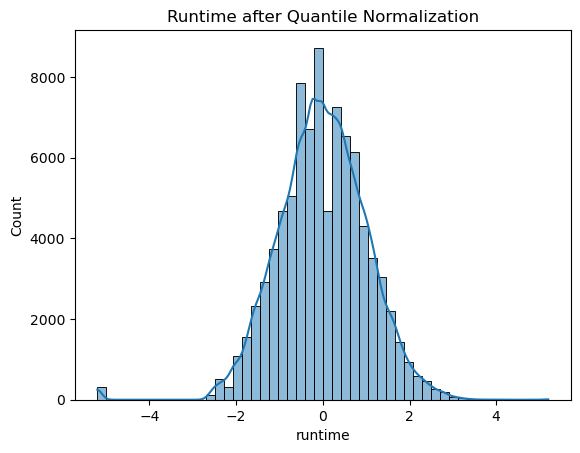

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['runtime'], bins=50, kde=True)
plt.title("Runtime after Quantile Normalization")
plt.show()

In [43]:
df.info()

df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movieId              87569 non-null  int64   
 1   runtime              87569 non-null  float64 
 2   overview             85652 non-null  object  
 3   title                87569 non-null  object  
 4   genres               85959 non-null  object  
 5   if_blockbuster       87569 non-null  int64   
 6   highly_watched       87569 non-null  int64   
 7   release_year         87569 non-null  float64 
 8   decade               86416 non-null  category
 9   highly_rated         87569 non-null  int64   
 10  engagement_score     87569 non-null  float64 
 11  semantic_keywords    87569 non-null  object  
 12  cast_importance      87569 non-null  float64 
 13  top_cast_members     87569 non-null  object  
 14  director_score       87569 non-null  float64 
 15  top_directors      

,movieId,runtime,overview,title,genres,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title
0,1,-0.809168,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"Animation, Adventure, Family, Comedy",1,1,1995.0,"[1990, 2000)",1,3.119443,"[goes, walkie talkie, toy comes to life, beyon...",2.023313,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",1.951412,[John Lasseter],1,1,1,"[go, walkie talkie, toy come life, beyond, new...","[buzz, andy, woody, afraid, scene, difference,...","[difference, place, room, andy, scene, beyond,...","[toy, story]"
1,2,0.642543,When siblings Judy and Peter discover an encha...,Jumanji,"Adventure, Fantasy, Family",1,1,1995.0,"[1990, 2000)",1,2.223978,"[recluse, dice, giant insect, board game, disa...",2.054534,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",1.906920,[Joe Johnston],1,1,1,"[recluse, dice, giant insect, board game, disa...","[board, magical, risky, monkey, freedom, alan,...","[board, dice, magical, risky, based young adul...",[jumanji]
2,3,0.504922,A family wedding reignites the ancient feud be...,Grumpier Old Men,"Romance, Comedy",0,1,1995.0,"[1990, 2000)",0,1.391215,"[old man, fighting, best friend, pranks, weddi...",1.171583,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Walt...",1.489180,[Howard Deutch],1,1,1,"[old man, fighting, best friend, prank, weddin...","[family, italian, time, seafood, wedding, fish...","[family, italian, best friend, time, wedding, ...","[old, men]"
3,4,1.467860,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,"Comedy, Drama, Romance",0,1,1995.0,"[1990, 2000)",0,1.179421,"[forget, single mother, never, divorce, let, p...",1.525578,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",0.904131,[Forest Whitaker],1,1,1,"[forget, single mother, never, divorce, let, p...","[lover, vannah, woman, stellar, string, robin,...","[lover, never, good, well, people, interracial...",[_UNKNOWN_]
4,5,0.746351,Just when George Banks has recovered from his ...,Father of the Bride Part II,"Comedy, Family",0,1,1995.0,"[1990, 2000)",0,1.529060,"[remake, hes, parent child relationship, back,...",1.961325,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",1.379167,[Charles Shyer],1,1,1,"[remake, he, parent child relationship, back, ...","[pregnant, arrival, banks, home, george, weddi...","[remake, wedding, kid, plan, parent child rela...","[father, bride, part, ii]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,0.336178,After a chaotic night of rioting in a marginal...,La Haine,Drama,0,1,1995.0,"[1990, 2000)",1,1.930224,"[hip-hop, matter, male friendship, racism, far...",1.142515,"[Vincent Cassel, Saïd Taghmaoui]",1.323276,[Mathieu Kassovitz],1,1,1,"[hip-hop, matter, male friendship, racism, far...","[marginal, news, rioting, young, chaotic, heal...","[young, hip-hop, matter, male friendship, raci...",[la]
96,98,0.695908,"A dark, hip, urban story of a barren and anony...",Shopping,"Action, Adventure, Drama, Science Fiction, Thr...",0,0,1994.0,"[1990, 2000)",0,0.501451,"[money, prison, england, spray paint, paying, ...",1.529520,"[Jude Law, Sean Bean, Jonathan Pryce, Ralph In...",2.092905,[Paul W.S. Anderson],1,1,1,"[money, prison, england, spray paint, paying, ...","[city, story, barren, arrive, underclass, fier...","[money, city, story, without, shopping mall, b...",[shopping]
97,99,0.746351,A documentary crew from the BBC arrives in L.A...,Heidi Fleiss: Hollywood Madam,Documentary,0,0,1995.0,"[1990, 2000)",0,-0.222880,"[based on true story, madam, hollywood, narrat...",-0.328753,[Corinne Bohrer],0.135878,[Nick Broomfield],1,1,1,"[based true story, madam, hollywood, narration...","[young, time, madam, nagy, month, fleiss, came...","[young, time, madam, month, camera, people, ho...","[heidi, 

# Enkodowanie wartosci z kategoriami

In [44]:
df['genre_list'] = df['genres'].str.split(', ')
df = df.drop(columns='genres')
df['genre_list'] = df['genre_list'].fillna('').apply(lambda x: [] if x == '' else x)

# df = encode_using_mlb(df, 'genre_list')

all_genres = sorted(set(g for sublist in df['genre_list'] for g in sublist if g))
genre_to_idx = {g: i for i, g in enumerate(all_genres)}
genre_to_idx['_UNKNOWN_'] = len(genre_to_idx)

df['genre_ids'] = df['genre_list'].apply(
    lambda genres: [genre_to_idx.get(g, genre_to_idx['_UNKNOWN_']) for g in genres] if genres else [genre_to_idx['_UNKNOWN_']]
)

df = df.drop(columns='genre_list')

In [45]:
df = pd.get_dummies(df, columns=['decade'], prefix='decade')

In [46]:
print(df.head())

   movieId   runtime                                           overview  \
0        1 -0.809168  Led by Woody, Andy's toys live happily in his ...   
1        2  0.642543  When siblings Judy and Peter discover an encha...   
2        3  0.504922  A family wedding reignites the ancient feud be...   
3        4  1.467860  Cheated on, mistreated and stepped on, the wom...   
4        5  0.746351  Just when George Banks has recovered from his ...   

                         title  if_blockbuster  highly_watched  release_year  \
0                    Toy Story               1               1        1995.0   
1                      Jumanji               1               1        1995.0   
2             Grumpier Old Men               0               1        1995.0   
3            Waiting to Exhale               0               1        1995.0   
4  Father of the Bride Part II               0               1        1995.0   

   highly_rated  engagement_score  \
0             1          3.1194

# Enkodowanie wartości tekstowych

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              87569 non-null  int64  
 1   runtime              87569 non-null  float64
 2   overview             85652 non-null  object 
 3   title                87569 non-null  object 
 4   if_blockbuster       87569 non-null  int64  
 5   highly_watched       87569 non-null  int64  
 6   release_year         87569 non-null  float64
 7   highly_rated         87569 non-null  int64  
 8   engagement_score     87569 non-null  float64
 9   semantic_keywords    87569 non-null  object 
 10  cast_importance      87569 non-null  float64
 11  top_cast_members     87569 non-null  object 
 12  director_score       87569 non-null  float64
 13  top_directors        87569 non-null  object 
 14  has_keywords         87569 non-null  int64  
 15  has_cast             87569 non-null 

In [48]:
from collections import Counter

TOP_N = 10000 # WE SETUP HOW MANY FEATURES MATTERS (INSTEAD OF TF-IDF)

all_tokens = [token for sublist in df["tokens_combined"] for token in sublist]
token_counts = Counter(all_tokens)
common_tokens = set([token for token, _ in token_counts.most_common(TOP_N)])

common_tokens.add("_UNKNOWN_")
df["filtered_tokens"] = df["tokens_combined"].apply(
    lambda tokens: [t for t in tokens if t in common_tokens] if isinstance(tokens, list) else ["_UNKNOWN_"]
)

In [49]:
df['cleaned_title'] = df['cleaned_title'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

In [50]:
df['text_tokens'] = df.apply(
    lambda row: row['filtered_tokens'] + row['cleaned_title'], axis=1
)

assert df['text_tokens'].apply(lambda x: len(x) > 0).all(), "PUSTE TOKENY!"

In [51]:
print(f"_UNKNOWN_' in text_tokens: {(df['text_tokens'].apply(lambda x: '_UNKNOWN_' in x).mean() * 100):.2f}%")

_UNKNOWN_' in text_tokens: 17.03%


In [52]:
from gensim.models import Word2Vec

sentences = df["text_tokens"].tolist()
sentences = [s for s in sentences if s]
sentences.append(["_UNKNOWN_"])

own_model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

# TOKENIZING AND CREATING VECTORS FOR LEMMATIZED_KEYWORDS

def average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else model.wv["_UNKNOWN_"]

df["text_embedded"] = df["text_tokens"].apply(lambda tokens: average_vector(tokens, own_model))

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similar_movies(df, movie_id, top_n=10):
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    if 'text_embedded' not in df.columns:
        raise ValueError("Brakuje kolumny 'text_embedded'.")

    df['movieId'] = pd.to_numeric(df['movieId'], errors='coerce')

    row = df[df['movieId'] == movie_id]
    if row.empty:
        raise ValueError(f"Nie znaleziono filmu o movieId: {movie_id}")

    vec = row['text_embedded'].values[0]
    if isinstance(vec, list):
        vec = np.array(vec)
    vec = vec.reshape(1, -1)

    all_vecs = np.stack(df['text_embedded'].values)
    similarities = cosine_similarity(vec, all_vecs)[0]

    df['similarity'] = similarities
    title = row['title'].values[0]

    print(f"Film testowy: {title} (movieId: {movie_id})\n")
    print("Top podobnych filmów:")

    similar = df[df['movieId'] != movie_id].sort_values('similarity', ascending=False)
    print(similar[['title', 'similarity']].head(top_n).to_string(index=False))


In [54]:
df.head(10)

,movieId,runtime,overview,title,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",filtered_tokens,text_tokens,text_embedded
0,1,-0.809168,"Led by Woody, Andy's toys live happily in his ...",Toy Story,1,1,1995.0,1,3.119443,"[goes, walkie talkie, toy comes to life, beyon...",2.023313,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",1.951412,[John Lasseter],1,1,1,"[go, walkie talkie, toy come life, beyond, new...","[buzz, andy, woody, afraid, scene, difference,...","[difference, place, room, andy, scene, beyond,...","[toy, story]","[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[difference, place, room, andy, scene, beyond,...","[difference, place, room, andy, scene, beyond,...","[-0.03363119, 0.058252107, 0.011700116, 0.0189..."
1,2,0.642543,When siblings Judy and Peter discover an encha...,Jumanji,1,1,1995.0,1,2.223978,"[recluse, dice, giant insect, board game, disa...",2.054534,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",1.906920,[Joe Johnston],1,1,1,"[recluse, dice, giant insect, board game, disa...","[board, magical, risky, monkey, freedom, alan,...","[board, dice, magical, risky, based young adul...",[jumanji],"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[board, dice, magical, risky, based young adul...","[board, dice, magical, risky, based young adul...","[-0.012700176, 0.09109572, 0.06801823, 0.11706..."
2,3,0.504922,A family wedding reignites the ancient feud be...,Grumpier Old Men,0,1,1995.0,0,1.391215,"[old man, fighting, best friend, pranks, weddi...",1.171583,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Walt...",1.489180,[Howard Deutch],1,1,1,"[old man, fighting, best friend, prank, weddin...","[family, italian, time, seafood, wedding, fish...","[family, italian, best friend, time, wedding, ...","[old, men]","[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[family, italian, best friend, time, wedding, ...","[family, italian, best friend, time, wedding, ...","[-0.07222127, 0.07304898, 0.020767335, 0.08155..."
3,4,1.467860,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,0,1,1995.0,0,1.179421,"[forget, single mother, never, divorce, let, p...",1.525578,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",0.904131,[Forest Whitaker],1,1,1,"[forget, single mother, never, divorce, let, p...","[lover, vannah, woman, stellar, string, robin,...","[lover, never, good, well, people, interracial...",[_UNKNOWN_],"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[lover, never, good, well, people, interracial...","[lover, never, good, well, people, interracial...","[-0.09461512, 0.045484394, 0.003287486, 0.0215..."
4,5,0.746351,Just when George Banks has recovered from his ...,Father of the Bride Part II,0,1,1995.0,0,1.529060,"[remake, hes, parent child relationship, back,...",1.961325,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",1.379167,[Charles Shyer],1,1,1,"[remake, he, parent child relationship, back, ...","[pregnant, arrival, banks, home, george, weddi...","[remake, wedding, kid, plan, parent child rela...","[father, bride, part, ii]","[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[remake, wedding, kid, plan, parent child rela...","[remake, wedding, kid, plan, parent child rela...","[-0.08386854, 0.021913705, 0.048650626, 0.0577..."
5,6,2.32597

In [55]:
show_similar_movies(df, movie_id=296, top_n=5)
df.drop(columns=["similarity"], inplace=True, errors="ignore")

Film testowy: Pulp Fiction (movieId: 296)

Top podobnych filmów:
        title  similarity
 Tango & Cash    0.967452
  Playing God    0.964746
     The Heat    0.964707
L.A. Takedown    0.960134
         Rush    0.958250


In [56]:
# def get_average_w2v_embedding(title_tokens, model):
#     vectors = [model.wv[word] for word in title_tokens if word in model.wv]
#     return np.mean(vectors, axis=0) if vectors else model.wv["_UNKNOWN_"]
#
# df['title_embedded'] = df['cleaned_title'].apply(lambda x: get_average_w2v_embedding(x, own_model))
#
# print(df[['title', 'title_embedded']].head(10))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              87569 non-null  int64  
 1   runtime              87569 non-null  float64
 2   overview             85652 non-null  object 
 3   title                87569 non-null  object 
 4   if_blockbuster       87569 non-null  int64  
 5   highly_watched       87569 non-null  int64  
 6   release_year         87569 non-null  float64
 7   highly_rated         87569 non-null  int64  
 8   engagement_score     87569 non-null  float64
 9   semantic_keywords    87569 non-null  object 
 10  cast_importance      87569 non-null  float64
 11  top_cast_members     87569 non-null  object 
 12  director_score       87569 non-null  float64
 13  top_directors        87569 non-null  object 
 14  has_keywords         87569 non-null  int64  
 15  has_cast             87569 non-null 

In [58]:
# FALLBACK FOR VECTORS THAT EQUALS 0 (NOT NEEDED WHEN WE USE FLAG _UNKNOWN_)

# import numpy as np
#
# def get_fallback_vector(column):
#     vectors = np.stack(column[column.apply(lambda v: np.any(v))].values)
#     return np.mean(vectors, axis=0)
#
# fallback_title = get_fallback_vector(df['title_embedded'])
# fallback_combined = get_fallback_vector(df['keywords_embedded'])
#
# df['title_embedded'] = df['title_embedded'].apply(
#     lambda vec: vec if np.any(vec) else fallback_title
# )
#
# df['keywords_embedded'] = df['keywords_embedded'].apply(
#     lambda vec: vec if np.any(vec) else fallback_combined
# )

In [59]:
actors = ["_UNKNOWN_"] + sorted(set(df['top_cast_members'].explode()))
directors = ["_UNKNOWN_"] + sorted(set(df['top_directors'].explode()))

actor_to_idx = {actor: idx for idx, actor in enumerate(actors)}
director_to_idx = {director: idx for idx, director in enumerate(directors)}

def encode_members(members, member_to_idx):
    return [member_to_idx.get(member, 0) for member in members]  # 0 = _UNKNOWN_

df['actor_ids'] = df['top_cast_members'].apply(lambda x: encode_members(x, actor_to_idx))
df['director_ids'] = df['top_directors'].apply(lambda x: encode_members(x, director_to_idx))

print(df[['title', 'actor_ids', 'director_ids']].head(10))

# actors = df['top_cast_members'].explode().unique()
# directors = df['top_directors'].explode().unique()
#
# actor_to_idx = {actor: idx for idx, actor in enumerate(actors)}
# director_to_idx = {director: idx for idx, director in enumerate(directors)}
#
# def encode_members(members, member_to_idx):
#     return [member_to_idx.get(member, -1) for member in members]
#
# df['actor_ids'] = df['top_cast_members'].apply(lambda x: encode_members(x, actor_to_idx))
# df['director_ids'] = df['top_directors'].apply(lambda x: encode_members(x, director_to_idx))
#
# # self.actor_embedding = nn.Embedding(num_actors, 50)
# # embedded = self.actor_embedding(actor_ids)
#
# print(df[['title', 'actor_ids', 'director_ids']].head(10))

                         title                         actor_ids director_ids
0                    Toy Story  [11309, 11212, 2822, 11777, 736]       [2492]
1                      Jumanji          [9846, 6528, 1355, 8878]       [2398]
2             Grumpier Old Men  [6425, 2472, 4701, 11794, 10659]       [1970]
3            Waiting to Exhale           [2667, 609, 8333, 7046]       [1482]
4  Father of the Bride Part II   [10791, 1009, 7614, 2718, 6444]        [749]
5                         Heat     [9736, 174, 11533, 926, 8333]       [3443]
6                      Sabrina    [4204, 4034, 2368, 5937, 8227]       [4840]
7                 Tom and Huck    [7444, 1387, 8000, 9316, 2253]       [3947]
8                 Sudden Death          [5111, 9264, 7962, 9448]       [3951]
9                    GoldenEye  [9209, 5906, 3423, 10330, 11058]       [3288]


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              87569 non-null  int64  
 1   runtime              87569 non-null  float64
 2   overview             85652 non-null  object 
 3   title                87569 non-null  object 
 4   if_blockbuster       87569 non-null  int64  
 5   highly_watched       87569 non-null  int64  
 6   release_year         87569 non-null  float64
 7   highly_rated         87569 non-null  int64  
 8   engagement_score     87569 non-null  float64
 9   semantic_keywords    87569 non-null  object 
 10  cast_importance      87569 non-null  float64
 11  top_cast_members     87569 non-null  object 
 12  director_score       87569 non-null  float64
 13  top_directors        87569 non-null  object 
 14  has_keywords         87569 non-null  int64  
 15  has_cast             87569 non-null 

In [61]:
df.head(87000)

,movieId,runtime,overview,title,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,has_keywords,has_cast,has_director,lemmatized_keywords,overview_spacy,tokens_combined,cleaned_title,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",filtered_tokens,text_tokens,text_embedded,actor_ids,director_ids
0,1,-0.809168,"Led by Woody, Andy's toys live happily in his ...",Toy Story,1,1,1995.0,1,3.119443,"[goes, walkie talkie, toy comes to life, beyon...",2.023313,"[Tom Hanks, Tim Allen, Don Rickles, Wallace Sh...",1.951412,[John Lasseter],1,1,1,"[go, walkie talkie, toy come life, beyond, new...","[buzz, andy, woody, afraid, scene, difference,...","[difference, place, room, andy, scene, beyond,...","[toy, story]","[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[difference, place, room, andy, scene, beyond,...","[difference, place, room, andy, scene, beyond,...","[-0.03363119, 0.058252107, 0.011700116, 0.0189...","[11309, 11212, 2822, 11777, 736]",[2492]
1,2,0.642543,When siblings Judy and Peter discover an encha...,Jumanji,1,1,1995.0,1,2.223978,"[recluse, dice, giant insect, board game, disa...",2.054534,"[Robin Williams, Kirsten Dunst, Bonnie Hunt, P...",1.906920,[Joe Johnston],1,1,1,"[recluse, dice, giant insect, board game, disa...","[board, magical, risky, monkey, freedom, alan,...","[board, dice, magical, risky, based young adul...",[jumanji],"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[board, dice, magical, risky, based young adul...","[board, dice, magical, risky, based young adul...","[-0.012700176, 0.09109572, 0.06801823, 0.11706...","[9846, 6528, 1355, 8878]",[2398]
2,3,0.504922,A family wedding reignites the ancient feud be...,Grumpier Old Men,0,1,1995.0,0,1.391215,"[old man, fighting, best friend, pranks, weddi...",1.171583,"[Kevin Pollak, Daryl Hannah, Jack Lemmon, Walt...",1.489180,[Howard Deutch],1,1,1,"[old man, fighting, best friend, prank, weddin...","[family, italian, time, seafood, wedding, fish...","[family, italian, best friend, time, wedding, ...","[old, men]","[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[family, italian, best friend, time, wedding, ...","[family, italian, best friend, time, wedding, ...","[-0.07222127, 0.07304898, 0.020767335, 0.08155...","[6425, 2472, 4701, 11794, 10659]",[1970]
3,4,1.467860,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,0,1,1995.0,0,1.179421,"[forget, single mother, never, divorce, let, p...",1.525578,"[Dennis Haysbert, Angela Bassett, Mykelti Will...",0.904131,[Forest Whitaker],1,1,1,"[forget, single mother, never, divorce, let, p...","[lover, vannah, woman, stellar, string, robin,...","[lover, never, good, well, people, interracial...",[_UNKNOWN_],"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[lover, never, good, well, people, interracial...","[lover, never, good, well, people, interracial...","[-0.09461512, 0.045484394, 0.003287486, 0.0215...","[2667, 609, 8333, 7046]",[1482]
4,5,0.746351,Just when George Banks has recovered from his ...,Father of the Bride Part II,0,1,1995.0,0,1.529060,"[remake, hes, parent child relationship, back,...",1.961325,"[Steve Martin, BD Wong, Martin Short, Diane Ke...",1.379167,[Charles Shyer],1,1,1,"[remake, he, parent child relationship, back, ...","[pregnant, arrival, banks, home, george, weddi...","[remake, wedding, kid, plan, parent child rela...","[father, bride, part, ii]","[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False

In [62]:
count_result = count_zeros_and_empty(df)
print(count_result)

{'movieId': {'zeros': 0}, 'runtime': {'zeros': 0}, 'title': {'empty_strings': 0}, 'if_blockbuster': {'zeros': 85113}, 'highly_watched': {'zeros': 79641}, 'release_year': {'zeros': 0}, 'highly_rated': {'zeros': 78982}, 'engagement_score': {'zeros': 0}, 'cast_importance': {'zeros': 0}, 'director_score': {'zeros': 0}, 'has_keywords': {'zeros': 27346}, 'has_cast': {'zeros': 8996}, 'has_director': {'zeros': 8996}, 'decade_[1890, 1900)': {'zeros': 87359}, 'decade_[1900, 1910)': {'zeros': 87273}, 'decade_[1910, 1920)': {'zeros': 87188}, 'decade_[1920, 1930)': {'zeros': 86846}, 'decade_[1930, 1940)': {'zeros': 84986}, 'decade_[1940, 1950)': {'zeros': 84812}, 'decade_[1950, 1960)': {'zeros': 83965}, 'decade_[1960, 1970)': {'zeros': 83219}, 'decade_[1970, 1980)': {'zeros': 81604}, 'decade_[1980, 1990)': {'zeros': 81259}, 'decade_[1990, 2000)': {'zeros': 79465}, 'decade_[2000, 2010)': {'zeros': 72316}, 'decade_[2010, 2020)': {'zeros': 59772}, 'decade_[2020, 2030)': {'zeros': 79486}}


# Zapisanie pliku do PARQUET i finalne przygotowanie danych

In [63]:
movie = df.loc[df['title'] == 'Gladiator']
print(movie)

      movieId   runtime                                           overview  \
3480     3578  2.053336  In the year 180, the death of emperor Marcus A...   
7640     8132  0.504922  Tommy Riley has moved with his dad to Chicago ...   

          title  if_blockbuster  highly_watched  release_year  highly_rated  \
3480  Gladiator               1               1        2000.0             1   
7640  Gladiator               0               1        1992.0             1   

      engagement_score                                  semantic_keywords  \
3480          3.099438  [commodus, 2nd century, gladiator, senate, her...   
7640          1.629195  [tournament, riley, nobody, illinois, boxer, b...   

      cast_importance                                   top_cast_members  \
3480         2.408079  [Djimon Hounsou, Russell Crowe, Joaquin Phoeni...   
7640         0.895452                  [Cuba Gooding Jr., Brian Dennehy]   

      director_score       top_directors  has_keywords  has_cast  

In [64]:
columns_to_drop = [
    'semantic_keywords',
    'lemmatized_keywords',
    'overview',
    'overview_spacy',
    'tokens_combined',
    'filtered_tokens',
    'title',
    'cleaned_title',
    'top_cast_members',
    'top_directors',
    'text_tokens',
    'release_year'
]

df = df.drop(columns=columns_to_drop)
print('Final shape:', df.shape)

Final shape: (87569, 29)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              87569 non-null  int64  
 1   runtime              87569 non-null  float64
 2   if_blockbuster       87569 non-null  int64  
 3   highly_watched       87569 non-null  int64  
 4   highly_rated         87569 non-null  int64  
 5   engagement_score     87569 non-null  float64
 6   cast_importance      87569 non-null  float64
 7   director_score       87569 non-null  float64
 8   has_keywords         87569 non-null  int64  
 9   has_cast             87569 non-null  int64  
 10  has_director         87569 non-null  int64  
 11  genre_ids            87569 non-null  object 
 12  decade_[1890, 1900)  87569 non-null  bool   
 13  decade_[1900, 1910)  87569 non-null  bool   
 14  decade_[1910, 1920)  87569 non-null  bool   
 15  decade_[1920, 1930)  87569 non-null 

In [66]:
embedding_columns = ['text_embedded'] # 'title_embedded'

for col in embedding_columns:
    def process(x):
        if hasattr(x, 'detach'):
            x = x.detach().cpu().numpy()
        x = np.array(x, dtype=np.float32)
        if len(x.shape) > 1:
            x = x.mean(axis=0)
        return x

    df[col] = df[col].apply(process)

In [67]:
df.head(10)

,movieId,runtime,if_blockbuster,highly_watched,highly_rated,engagement_score,cast_importance,director_score,has_keywords,has_cast,has_director,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",text_embedded,actor_ids,director_ids
0,1,-0.809168,1,1,1,3.119443,2.023313,1.951412,1,1,1,"[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.03363119, 0.058252107, 0.011700116, 0.0189...","[11309, 11212, 2822, 11777, 736]",[2492]
1,2,0.642543,1,1,1,2.223978,2.054534,1.906920,1,1,1,"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.012700176, 0.09109572, 0.06801823, 0.11706...","[9846, 6528, 1355, 8878]",[2398]
2,3,0.504922,0,1,0,1.391215,1.171583,1.489180,1,1,1,"[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.07222127, 0.07304898, 0.020767335, 0.08155...","[6425, 2472, 4701, 11794, 10659]",[1970]
3,4,1.467860,0,1,0,1.179421,1.525578,0.904131,1,1,1,"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.09461512, 0.045484394, 0.003287486, 0.0215...","[2667, 609, 8333, 7046]",[1482]
4,5,0.746351,0,1,0,1.529060,1.961325,1.379167,1,1,1,"[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.08386854, 0.021913705, 0.048650626, 0.0577...","[10791, 1009, 7614, 2718, 6444]",[749]
5,6,2.325972,1,1,1,2.483694,2.311308,1.897929,1,1,1,"[0, 4, 6]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.14546886, 0.025541427, 0.09526493, -0.0069...","[9736, 174, 11533, 926, 8333]",[3443]
6,7,1.467860,0,1,0,1.537711,1.841765,2.046024,1,1,1,"[3, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.07715873, 0.0448047, 0.026102265, 0.058691...","[4204, 4034, 2368, 5937, 8227]",[4840]
7,8,0.276998,0,0,0,1.008789,1.103399,1.528582,1,1,1,"[7, 0, 1, 6]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.063999645, 0.023874545, -0.03746127, 0.061...","[7444, 1387, 8000, 9316, 2253]",[3947]
8,9,0.916587,0,1,0,1.533218,1.400913,1.763653,1,1,1,[0],False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.10498774, 0.024053872, 0.107735805, 0.0781...","[5111, 9264, 7962, 9448]",[3951]
9,10,1.550085,1,1,1,2.145526,1.884174,2.078986,1,1,1,"[1, 0, 16]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.1708919, 0.08866581, 0.11179956, 0.0666956...","[9209, 5906, 3423, 10330, 11058]",[3288]


In [68]:
cols = df.columns.tolist()
cols.remove('movieId')
new_order = ['movieId'] + cols

df_final = df[new_order]

In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              87569 non-null  int64  
 1   runtime              87569 non-null  float64
 2   if_blockbuster       87569 non-null  int64  
 3   highly_watched       87569 non-null  int64  
 4   highly_rated         87569 non-null  int64  
 5   engagement_score     87569 non-null  float64
 6   cast_importance      87569 non-null  float64
 7   director_score       87569 non-null  float64
 8   has_keywords         87569 non-null  int64  
 9   has_cast             87569 non-null  int64  
 10  has_director         87569 non-null  int64  
 11  genre_ids            87569 non-null  object 
 12  decade_[1890, 1900)  87569 non-null  bool   
 13  decade_[1900, 1910)  87569 non-null  bool   
 14  decade_[1910, 1920)  87569 non-null  bool   
 15  decade_[1920, 1930)  87569 non-null 

In [70]:
df_final.head(1000)

,movieId,runtime,if_blockbuster,highly_watched,highly_rated,engagement_score,cast_importance,director_score,has_keywords,has_cast,has_director,genre_ids,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",text_embedded,actor_ids,director_ids
0,1,-0.809168,1,1,1,3.119443,2.023313,1.951412,1,1,1,"[2, 1, 7, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.03363119, 0.058252107, 0.011700116, 0.0189...","[11309, 11212, 2822, 11777, 736]",[2492]
1,2,0.642543,1,1,1,2.223978,2.054534,1.906920,1,1,1,"[1, 8, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.012700176, 0.09109572, 0.06801823, 0.11706...","[9846, 6528, 1355, 8878]",[2398]
2,3,0.504922,0,1,0,1.391215,1.171583,1.489180,1,1,1,"[13, 3]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.07222127, 0.07304898, 0.020767335, 0.08155...","[6425, 2472, 4701, 11794, 10659]",[1970]
3,4,1.467860,0,1,0,1.179421,1.525578,0.904131,1,1,1,"[3, 6, 13]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.09461512, 0.045484394, 0.003287486, 0.0215...","[2667, 609, 8333, 7046]",[1482]
4,5,0.746351,0,1,0,1.529060,1.961325,1.379167,1,1,1,"[3, 7]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.08386854, 0.021913705, 0.048650626, 0.0577...","[10791, 1009, 7614, 2718, 6444]",[749]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1018,0.993800,0,0,0,0.934622,0.424899,1.427368,1,1,1,"[7, 3, 4]",False,False,False,False,False,False,False,True,False,False,False,False,False,False,"[-0.11897635, 0.04824369, 0.087911986, 0.05075...","[3166, 2603, 9856, 4261, 4024]",[4345]
996,1019,1.467860,1,1,1,1.685240,0.435634,1.738167,1,1,1,"[1, 6, 7, 14]",False,False,False,False,False,False,True,False,False,False,False,False,False,False,"[-0.054486606, 0.09873074, 0.15054204, 0.23477...","[6525, 9118, 4880, 11068]",[4191]
997,1020,0.336178,1,1,1,1.793628,1.025166,1.988399,1,1,1,"[3, 1, 6]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.117564835, 0.019237189, 0.05291045, 0.0252...","[5569, 2884, 9448, 7303]",[2566]
998,1021,0.548158,0,0,0,1.345452,1.438847,0.665990,1,1,1,"[3, 7, 8]",False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[-0.082792036, 0.03235541, -0.0053109294, 0.05...","[5815, 2442, 2049, 1129, 5060]",[5248]


In [72]:
df_final.to_parquet('../data/Movies_clean_Vec_v4_25keywords.parquet', compression='brotli', index=False)

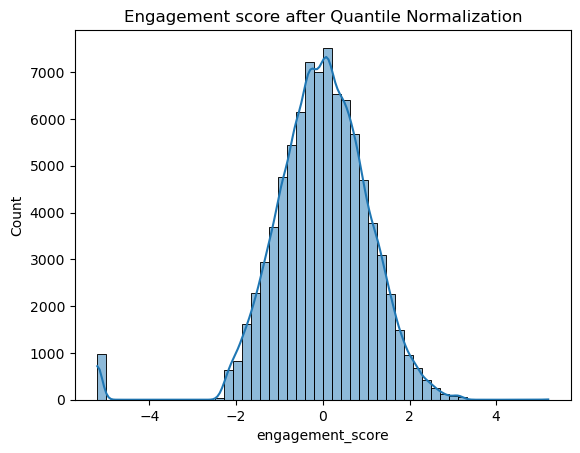

In [73]:
sns.histplot(df['engagement_score'], bins=50, kde=True)
plt.title("Engagement score after Quantile Normalization")
plt.show()